### Rolling window functions with pandas
In this notebook, you will begin to learn about window functions for time series in pandas.

Window functions are useful because they allow you to operate on sub periods of your time series. In particular, window functions calculate metrics for the data inside the window. Then, the result of this calculation forms a new time series, where each data point represents a summary of several data points of the original time series.


To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [46]:
#libraries
import pandas as pd 
import numpy as np
from datetime import datetime #To manually create dates
import matplotlib.pyplot as plt

In [47]:
#Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data
data = pd.read_csv('Datasets/air_quality_Data-/ozone2.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6291 non-null   int64  
 1   Ozone       6167 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 147.4 KB
None


In [48]:
data.tail()

,Unnamed: 0,Ozone
date,,
2017-03-27,6286,0.005640
2017-03-28,6287,0.013870
2017-03-29,6288,0.034341
2017-03-30,6289,0.026059
2017-03-31,6290,0.035983


In [49]:
#Add the columns '90D' and '360D' containing the 90 and 360 rolling calendar day .mean() for the column 'Ozone'
data['90D'] = data.Ozone.rolling(window="90D").mean()
data['360D'] = data.Ozone.rolling(window="360D").mean()
data.tail()


,Unnamed: 0,Ozone,90D,360D
date,,,,
2017-03-27,6286,0.005640,0.021992,0.026629
2017-03-28,6287,0.013870,0.021999,0.026583
2017-03-29,6288,0.034341,0.022235,0.026584
2017-03-30,6289,0.026059,0.022334,0.026599
2017-03-31,6290,0.035983,0.022467,0.026607


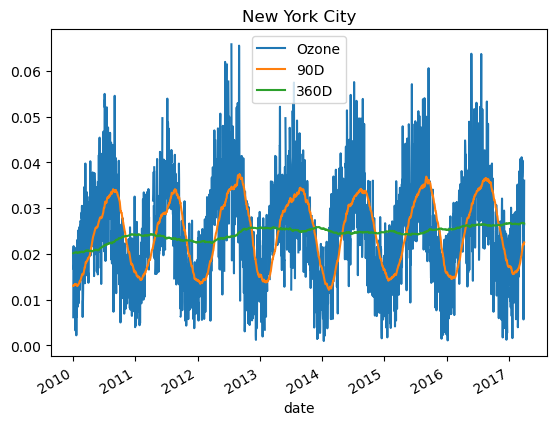

In [50]:
#Plot data starting 2010, setting 'New York City' as title#
data['2010':].plot(y=["Ozone","90D","360D"],title='New York City')
plt.show()


#### Rolling 360-day median & std. deviation for nyc ozone data since 2000

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

In [51]:
#Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, assign the result to data, and drop missing values using .dropna()
data = pd.read_csv('Datasets/air_quality_Data-/ozone2.csv', parse_dates=['date'], index_col='date').dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6167 non-null   int64  
 1   Ozone       6167 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 144.5 KB


In [52]:
#Select the 'Ozone' column and create a .rolling() window using 360 periods, apply .agg() to calculate the mean and std, and assign this to rolling_stats
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])
rolling_stats.head(360)

,mean,std
date,,
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
...,...,...
2000-12-31,NaN,NaN
2001-01-01,NaN,NaN
2001-01-02,NaN,NaN


In [53]:
# Join rolling_stats with ozone data
stats = data.join(rolling_stats)
stats.head(360)

,Unnamed: 0,Ozone,mean,std
date,,,,
2000-01-01,0,0.004032,NaN,NaN
2000-01-02,1,0.009486,NaN,NaN
2000-01-03,2,0.005580,NaN,NaN
2000-01-04,3,0.008717,NaN,NaN
2000-01-05,4,0.013754,NaN,NaN
...,...,...,...,...
2000-12-31,365,0.016088,NaN,NaN
2001-01-01,366,0.016681,NaN,NaN
2001-01-02,367,0.012097,NaN,NaN


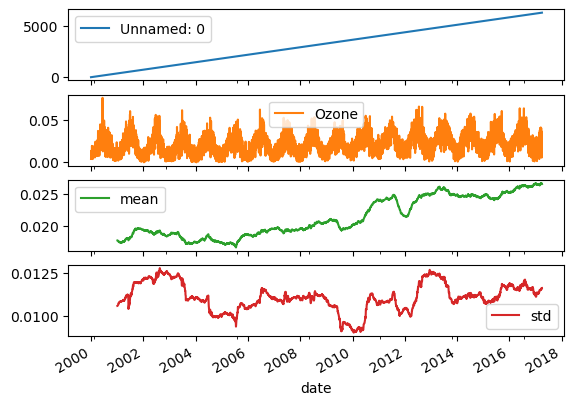

In [54]:
# Plot stats
stats.plot(subplots=True)
plt.show()

How does adding the standard deviation help you understand what's happening in the orignal series?

#### Rolling quantiles for daily air quality in nyc
rolling quantiles helps to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

In [55]:
#import and inspect Ozone2.csv
df = pd.read_csv('Datasets/air_quality_Data-/ozone2.csv', parse_dates=['date'], index_col='date')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6291 non-null   int64  
 1   Ozone       6167 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 147.4 KB
None


In [56]:
df.head(20)

,Unnamed: 0,Ozone
date,,
2000-01-01,0,0.004032
2000-01-02,1,0.009486
2000-01-03,2,0.005580
2000-01-04,3,0.008717
2000-01-05,4,0.013754
2000-01-06,5,0.009069
2000-01-07,6,0.008333
2000-01-08,7,0.007639
2000-01-09,8,0.004569


In [57]:
#Apply .resample() with daily frequency 'D' to data and apply .interpolate() to fill missing values, and reassign to data
df = df.resample("D").interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6300 non-null   float64
 1   Ozone       6300 non-null   float64
dtypes: float64(2)
memory usage: 147.7 KB


In [58]:
#Create a .rolling() window using 360 periods, select the column 'Ozone', and assign the result to rolling
rolling = df.Ozone.rolling(360)

In [59]:
#Insert three new columns, 'q10', 'q50' and 'q90' into data, calculating the respective quantiles from rolling
df['q10'] = rolling.quantile(0.1)
df['q50'] = rolling.quantile(0.5)
df['q90'] = rolling.quantile(0.9)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6300 non-null   float64
 1   Ozone       6300 non-null   float64
 2   q10         5941 non-null   float64
 3   q50         5941 non-null   float64
 4   q90         5941 non-null   float64
dtypes: float64(5)
memory usage: 295.3 KB


In [60]:
df.tail()

,Unnamed: 0,Ozone,q10,q50,q90
date,,,,,
2017-03-27,6286.0,0.005640,0.01134,0.026424,0.040893
2017-03-28,6287.0,0.013870,0.01134,0.026388,0.040893
2017-03-29,6288.0,0.034341,0.01134,0.026388,0.040893
2017-03-30,6289.0,0.026059,0.01134,0.026388,0.040893
2017-03-31,6290.0,0.035983,0.01134,0.026388,0.040893


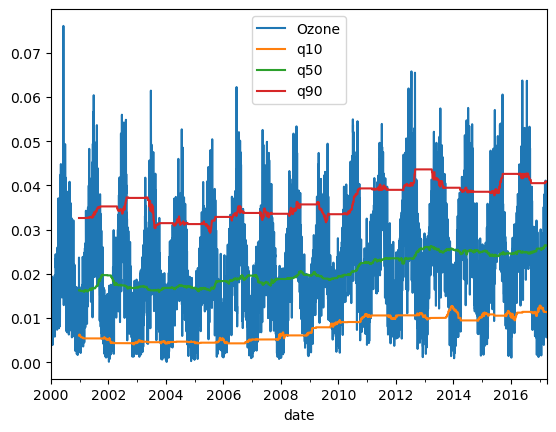

In [61]:
# Plot the data
df.plot(y=["Ozone","q10","q50","q90"])
plt.show()

#### Cumulative sum vs .diff()
We'll about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() 

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [62]:
#read data
data = pd.read_csv('Datasets/Stock_data-/google.csv', parse_dates=['Date'], index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [63]:
data.head(10)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52


In [64]:
#Apply .diff() to data, drop missing values, and assign the result to differences
differences = data.diff().dropna()
differences.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 594 entries, 2014-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   594 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB


In [65]:
differences.head(10)

,Close
Date,
2014-01-03,-4.05
2014-01-07,10.76
2014-01-08,1.18
2014-01-09,-5.49
2014-01-10,-0.03
2014-01-14,13.20
2014-01-15,-0.39
2014-01-16,3.79
2014-01-17,-2.84


In [66]:
#Use .first('D') to select the first price from data, and assign it to start_price
start_price = data.first('D')
start_price

,Close
Date,
2014-01-02,556.0


In [67]:
#Use .append() to combine start_price and differences, apply .cumsum() and assign this to cumulative_sum
cumulative_sum = start_price.append(differences).cumsum()
cumulative_sum.head()

C:\Users\Yira Yareth\AppData\Local\Temp\ipykernel_9756\3470628473.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_sum = start_price.append(differences).cumsum()


,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-07,562.71
2014-01-08,563.89
2014-01-09,558.40


In [68]:
#Use .equals() to compare data and cumulative_sum, and print the result.
data.equals(cumulative_sum)

False

The .cumsum() method allows you to reconstruct the original data from the differences.

#### Cumulative return on $1,000 invested in google vs apple I
To put your new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.

In [69]:
#loading Google and Apple stock prices in a variable datai
datai=pd.read_csv('Datasets/Stock_data-/apple_google.csv', parse_dates=['Date'], index_col='Date')
datai.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


In [70]:
datai.tail()

,AAPL,GOOG
Date,,
2017-05-24,153.34,954.96
2017-05-25,153.87,969.54
2017-05-26,153.61,971.47
2017-05-30,153.67,975.88
2017-05-31,152.76,964.86


In [71]:
#Define a variable investment with the value 1000
investment=1000

In [72]:
#Calculate returns by applying .pct_change() to datai
returns = datai.pct_change()
returns.tail()

,AAPL,GOOG
Date,,
2017-05-24,-0.002991,0.006471
2017-05-25,0.003456,0.015268
2017-05-26,-0.001690,0.001991
2017-05-30,0.000391,0.004540
2017-05-31,-0.005922,-0.011292


In [73]:
#Add 1 to returns and assign this to returns_plus_one
returns_plus_one = returns + 1
returns_plus_one.tail()

,AAPL,GOOG
Date,,
2017-05-24,0.997009,1.006471
2017-05-25,1.003456,1.015268
2017-05-26,0.998310,1.001991
2017-05-30,1.000391,1.004540
2017-05-31,0.994078,0.988708


In [74]:
#then apply .cumprod() to returns_plus_one and assign the result to cumulative_return
cumulative_return = returns_plus_one.cumprod()
cumulative_return.tail()

,AAPL,GOOG
Date,,
2017-05-24,3.341469,3.050406
2017-05-25,3.353018,3.096978
2017-05-26,3.347352,3.103143
2017-05-30,3.348660,3.117230
2017-05-31,3.328830,3.082029


In [75]:
#Multiply cumulative_return by investment
final=cumulative_return.mul(investment)
final.tail()

,AAPL,GOOG
Date,,
2017-05-24,3341.468730,3050.405673
2017-05-25,3353.018087,3096.978215
2017-05-26,3347.352364,3103.143167
2017-05-30,3348.659839,3117.229924
2017-05-31,3328.829810,3082.029004


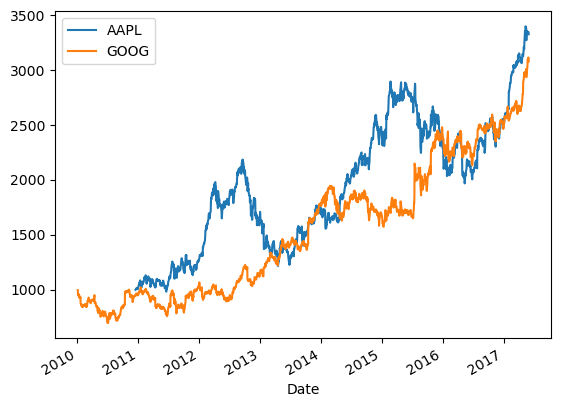

In [76]:
#plot the result.
final.plot()
plt.show()

Now let's take a look at the rolling annual returns on this investment.

#### Cumulative return on $1,000 invested in google vs apple II
Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

In [84]:
#Define a multi_period_return() function that returns the cumulative return from an array of period returns.
def multi_period_return(period_returns):
    return np.prod(period_returns+1)-1

In [85]:
#Calculate daily_returns by applying .pct_change() to data
daily_returns = datai.pct_change()

In [86]:
#Create a '360D' .rolling() window on daily_returns, and .apply() multi_period_returns. Assign the result to rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)
rolling_annual_returns 

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.029483
2010-01-07,NaN,-0.052099
2010-01-08,NaN,-0.039449
...,...,...
2017-05-24,0.528052,0.303415
2017-05-25,0.533333,0.323315
2017-05-26,0.538254,0.320434


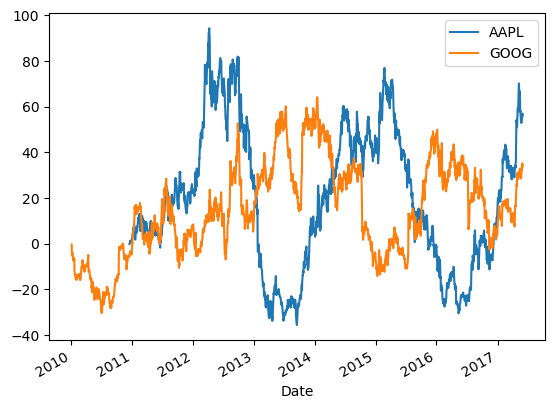

In [87]:
#Plot rolling_annual_returns after multiplying it by 100
rolling_annual_returns.mul(100).plot()
plt.show()

Do you think it's better to invest in Google or Apple?